In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize

# Problem 1

Suppose that, in a city of approximately three million, five people who have just become infectious have recently 
entered the city carrying a certain disease. Each of those individuals has one contact each day that could spread 
the disease, and an average of three days is spent in the infectious state. Find the solution of the corresponding
SIR equations using solve_ivp for fifty days, where each time period is half a day, and plot your results. Use the percentages 
of each state, not the actual number of people in the state. 

At the peak of the infection, how many in the city will still be able to work (assume for simplicity that those who are in the infectious state either cannot go to work or are unproductive, etc.)?

Hint: Use the t-values paramter in solve_ivp to pass in an array of t-values.

In [2]:
def prob1():
    #using solve_ivp: first get ODE function = all of the deriv have
    
    def ode(t, y):
        #have t bc all deriv are w/ respect to t
        #y here = [S, I, R] so y' which is what want here is y'=[S',I',R'] which given in lab manual
        #y[0] = S, y[1] = I, y[2] = R
        #beta = avg # contacts made/unit time period that cld. spread disease, is 1 here
        #gamma = reciprocal of avg length time spent in infectious phase, avg time spent = 3, so gamma = 1/3
        return np.array([-y[1]*y[0], y[1]*y[0]-(1/3)*y[1], (1/3)*y[1]])
    
    #next need time domain: tuple of interval of integration
    #want for 50 days so have (1,50) bc want start w/ day 1
    t_span = (1, 50)
    
    #initial condition: MUST be proportions of the total pop 3,000,000 bc want % of each state, NOT actual num of each state
    #first is how many are initially susceptible: everyone but those infected
    #second is how many are initially infected: this is 5 people
    #third is how many are initially recovered: this is 0 bc no one has had chance to recover yet
    y0 = np.array([(3000000-5)/3000000, 5/3000000, 0])
    
    #NOW: solve system using solve_ivp
    #t_eval is the time domain we plot over. want plot over 50 days with each period as 1/2 a day
    sol = solve_ivp(ode, t_span, y0, max_step = 1/2, t_eval=np.arange(1,50.5, 0.5)) #want each period to be 1/2 a day so make max_step be that
    
    #plot the results: plot for S, I and R each
    plt.plot(sol.t,sol.y[0], label = "Susceptible", color = "deeppink")
    plt.plot(sol.t, sol.y[1], label = "Infected", color = "dodgerblue")
    plt.plot(sol.t, sol.y[2], label = "Recovered", color = "darkorange")
    plt.xlabel("T(days)", color = "navy")
    plt.ylabel("Proportion of Population (%)", color = "navy")
    plt.legend(loc = "best")
    plt.title("SIR Model Solution", color = "navy")
    
    plt.show()
    
    ans = (1 - np.max(sol.y[1])) *3e6 #want those who are sitll able to work at peak of infection, so will be 1-I and need to take max since want at peak
    
    return ans 


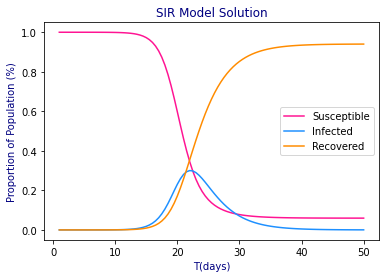

2099181.3817493147

In [3]:
prob1()

# Problem 2

On March 11, 2020, New York City had 52 confirmed cases of Covid-19. On that day New York started its 
lock-down measures. Using the following information, model what the spread of the virus could have 
been if New York did not implement any measures to curb the spread of the virus over the next 150 days:
    there are approximately 8.399 million people in New York city,
    the average case of Covid-19 lasts for 10 days, 
    and each infected person can spread the virus to 2.5 people.

Plot your results for each day.

1) At the projected peak, how many concurrent active cases are there?

2) Assuming that about 5% of Covid-19 cases require hospitalization, and using the fact that there are 
about 58,000 hospital beds in NYC, how much over capacity will the hospitals in NYC be at the projected peak?

In [4]:
def prob2():
    '''
    Using the SIR model, plot a graph that models the
    spead of a disease in NYC and answer the questions.
    1. the projected peak concurent cases
    2. capacity deficit at the projected peak

    returns:
        ans1, ans2: answers to questions 1 and 2
    '''
    
    def ode(t, y):
        #same as prob 1 bc SIR model using solve_ivp still
        #beta = avg # contacts made/unit time period that cld. spread disease, is 5/2 here BUT able infect
        #2.5 people EVERY period and a period is 10 days here so need to divide 2.5 by 10 !!!
        #gamma = reciprocal of avg length time spent in infectious phase, avg time spent = 10, so gamma = 1/10
        return np.array([-(2.5/10)*y[1]*y[0], (2.5/10)*y[1]*y[0]-(1/10)*y[1], (1/10)*y[1]])
    
    #next need time domain: tuple of interval of integration
    #want for 150 days. want days SINCE Mar 11 so include Mar 11 here, have it start at day 0
    t_span = (0, 150)
    
    #initial condition: MUST be proportions of the total pop 8,399,000 bc want % of each state, NOT actual num of each state
    #first is how many are initially susceptible: everyone but those infected
    #second is how many are initially infected: this is 52 people
    #third is how many are initially recovered: this is 0 bc no one has had chance to recover yet
    y0 = np.array([(8399000-52)/8399000, 52/8399000, 0])
    
    #NOW: solve system using solve_ivp
    #t_eval is the time domain we plot over. want plot over 150 days starting on day start counting so start at 0 here
    sol = solve_ivp(ode, t_span, y0, max_step = 1/2, t_eval=np.arange(0,150.5, 0.5)) 
    
    #plot the results: plot line for S, I, R each
    plt.plot(sol.t,sol.y[0], label = "Susceptible", color = "violet")
    plt.plot(sol.t, sol.y[1], label = "Infected", color = "navy")
    plt.plot(sol.t, sol.y[2], label = "Recovered", color = "indianred")
    plt.xlabel("Days since Mar 11", color = "deeppink")
    plt.ylabel("Proportion of Population (%)", color = "deeppink")
    plt.legend(loc = "best")
    plt.title("Modeling Covid-19 in NYC", color = "deeppink")
    
    plt.show()
    
    #get the answers to 2 questions asked in problem:
    max_prop = np.max(sol.y[1]) #want max active cases so want max of infected. will give you the proportion
    ans1 = max_prop * 8.399e6   
    
    ans2 = (((max_prop)*8.399e6)*0.05) - 58000
    
    return(ans1, ans2)
    

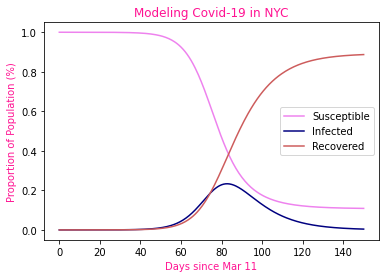

(1960865.8102033653, 40043.29051016827)

In [5]:
prob2()

# Problem 3

There are 7 billion people in the world. Suppose that influenza originates with 1000 people, and that they are contagious for 10 days before recovering.
Also suppose that on average someone makes one contact every two days that could spread the flu.
Since we can catch a new strain of the flu, suppose that a recovered individual becomes susceptible again with probability f=1/50. To assure a steady population, let the birth rate balance out the death rate, and in particular let μ=.0001.

Using the SIRS model above, plot the proportion of population that is Susceptible, Infected, and Recovered over a year span 365 days with one point for each day.

In [6]:
def prob3():
    '''
    Use the SIRS model to examine the spread of the 
    flu over the course of a year
    '''
    def ode(t, y):
        #using new derivative formulas now bc want allow for transfer from recovered to susceptible AND 
        #want birth/death rates so using equations 3.5,3.6,3.7 from lab manual
        #beta = 1 point each day but make 1 contact every 2 days so this is 1/2
        #gamma = reciprocal of avg length time spent in infectious phase, avg time spent = 10, so gamma = 1/10
        #f = 1/50 here
        #mu = .0001
        return np.array([(1/50)*y[2] + 0.0001*(1-y[0]) - (1/2)*y[1]*y[0], (1/2)*y[1]*y[0] - ((1/10) + 0.0001)*y[1], -(1/50)*y[2]+(1/10)*y[1]-0.0001*y[2]])  
                         
    #next need time domain: tuple of interval of integration
    #want for 365 days
    t_span = (1, 365)
    
    #initial condition
    #7 billion ppl total
    #originally 1000 ppl infected
    y0 = np.array([(7000000000-1000)/7000000000, 1000/7000000000, 0])
    
    #NOW: solve system using solve_ivp
    #t_eval is the time domain we plot over.
    sol = solve_ivp(ode, t_span, y0, max_step = 2, t_eval=np.arange(1,365, 2)) 
    
    #plot the results: plot line for S, I, R each
    plt.plot(sol.t,sol.y[0], label = "Susceptible", color = "darkslategray")
    plt.plot(sol.t, sol.y[1], label = "Infected", color = "tomato")
    plt.plot(sol.t, sol.y[2], label = "Recovered", color = "lime")
    plt.xlabel("Day", color = "midnightblue")
    plt.ylabel("Proportion of Population (%)", color = "midnightblue")
    plt.legend(loc = "best")
    plt.title("SIR Model of spread of flu over course of a year", color = "midnightblue")
    
    plt.show()
    

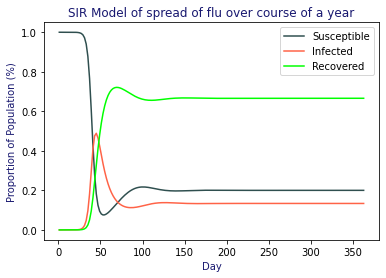

In [7]:
prob3()

# Problem 4

Fit the PGED model to the Covid-19 data provided in new_york_cases.npy.
Print the optimal values of alpha and T_G, and plot your results against 1-S(t).
Use one point for each day.

In [8]:
def prob4():
    '''
    Find the best parameters to fit the PEGD model
    to the data provided in new_york_cases.npy

    Plot the data against 1-S(t)
    '''
    ny_cases = np.load('new_york_cases.npy') #load in the data from file
    t_span = (1,69) #68 things, but tuple not inclusive. need for solve_ivp bc interval of integration
    total_pop = 8.399e6
    
    #y = [S,I,R] so: get initial conditions
    y0 = np.array([(total_pop - ny_cases[0])/total_pop, ny_cases[0]/total_pop, 0]) #data[0] is how many are infected
    t = np.arange(1,69) #measuring over 68 days. will use with solve_ivp later
    
    #define function we want to minimize
    def fun(params):
        alphy,T_G = params #unpack parameters. want use SIR model given: have alpha, T_G in it 
        
        #use SIR model, solve_ivp: so plug parameters into SIR model get
        def ode(t, y):
            return np.array([-(alphy/t)*y[1], ((alphy/t) - (1/T_G))*y[1], (1/T_G)*y[1]]) #equations 3.8-3.10 from lab manual
             
        sol = solve_ivp(ode, t_span, y0, t_eval=t) #get solution from solve_ivp. t_eval tells you how many pts want solution array to have
        
        out = 1 - sol.y[0] #get the model output: want 1-S and S is y[0] here
        
        diff = out - (ny_cases/total_pop) #find difference btw out and the data 
        
        return np.linalg.norm(diff)
        
    #make a guess for the parameters
    p0 = (1,1)
    
    #find best parameters for this model: this gives an object: doing .x tells you what best parameters were and we want optimal values of parameters
    alphy, T_G = minimize(fun, p0).x
    
    #now plug the new optimal parameters in to the ODE again: get it w/ optimal parameters to plot it
    def ode2(t, y):
        return np.array([-(alphy/t)*y[1], ((alphy/t) - (1/T_G))*y[1], (1/T_G)*y[1]])
    sol2 = solve_ivp(ode2, t_span, y0, t_eval=t) #get the solution from the optimal parameters
    
    #plot results: plot I(t), which is 1-S(t) with the opitimal parameters plugged in that found using PGED
    plt.plot(sol2.t, 1-sol2.y[0], color = "deeppink", label = "1-S(t)")  #plot data against 1-S. use sol2 bc that's optimal one
    plt.plot(sol2.t, ny_cases/total_pop, color = "steelblue", label = "Data") #plot the data
    plt.title("Modeling NYC covid cases with SIR", color = "indigo")
    plt.xlabel("Days since Mar 11", color = "indigo")
    plt.ylabel("Proportion of Population", color = "indigo")
    plt.legend(loc = "best")
    
    plt.show()

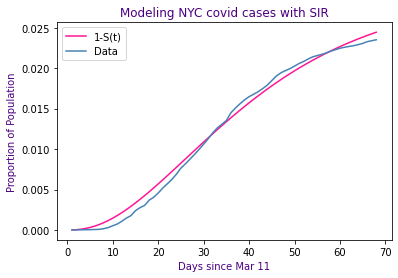

In [9]:
prob4()

# Problem 5

In [18]:
def prob5():
    '''
    Use solve_bvp to model the measles boundary value
    problem
    '''
    #define all the variables have:
    B1 = 1
    B0 = 1575
    B = lambda t: B0*(1+(B1*np.cos(2*np.pi*t)))
    lam = 0.0279
    mu = 0.02
    n = 0.01
    
    #first make the ode function:
    #y = [S,E,I,C1,C2,C3]
    def ode(t, y):
        return np.array([mu - B(t)*y[0]*y[2], B(t)*y[0]*y[2] - (y[1]/lam), y[1]/lam - y[2]/n, np.zeros(len(y[0])), np.zeros(len(y[0])), np.zeros(len(y[0]))])
    
    #w/ solve_bvp: need to make function for boundary conditions
    def bcs(ya, yb):
        BCa = ya[0 : 3]-ya[3 :]
        BCb = yb[0 : 3]-yb[3 :]
        
        return np.hstack([BCa, BCb])
    
    X = np.linspace(0,1,200) #plot over X, it's our linspace
    
    #initial guess: y is array of 6 elements
    y0 = np.array([.075,0,0.0001,.075,0,0.0001]).reshape((-1,1))*np.ones((6, len(X))) #.075 is where S on graph starts, I and E both starts at 0
                                       #C1(0) is same as S(0) bc of what they have in blue box
                                       #have 6 bc y is 6 long
    
    sol = solve_bvp(ode, bcs, X, y0)

    #plotting S:
    plt.plot(X, sol.y[0], color = "orangered", label = "Susceptible")
    plt.plot(X, sol.y[1], color = "deeppink", label = "Exposed")
    plt.plot(X, sol.y[2], color = "darkblue", label = "Infectious")
    plt.title("Model of the Measles Boundary Value Problem", color = "teal")
    plt.xlabel("T (years)", color = "teal")
    plt.ylabel("Proportion of Population", color = "teal")
    plt.legend(loc = "best")
    plt.show()


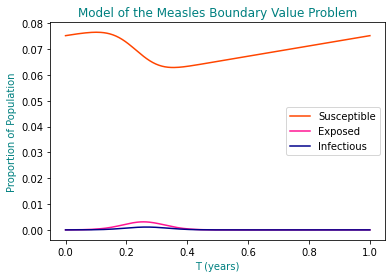

In [19]:
prob5()